#1. Implement logistic regression from scratch on a categorical dataset of your choice.

i) Choose categorical target variable

ii) Apply gradient descent and Maximum Likelihood Estimation for optimizing the target function

iii) Calculate Predicted accuracy

In [65]:
    # import numpy as np
    # import pandas as pd
    # from sklearn.preprocessing import LabelEncoder
    # from sklearn.model_selection import train_test_split

    # data = {
    #     'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    #     'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    #     'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
    # }

    # df=pd.DataFrame(data)

    # le_weather=LabelEncoder()
    # le_temperature=LabelEncoder()
    # le_play=LabelEncoder()

    # df['Weather']=le_weather.fit_transform(df['Weather'])
    # df['Temperature']=le_temperature.fit_transform(df['Temperature'])
    # df['Play']=le_play.fit_transform(df['Play'])

    # X=df[['Weather','Temperature']].values
    # Y=df['Play'].values.reshape(-1,1)

    # X=(X-X.mean(axis=0))/X.std(axis=0)

    # print(X.shape)
    # X=np.hstack((np.ones((X.shape[0],1)),X))
    # print(X.shape)

    # # print(Y.shape)


    # def sigmoid(z):
    #     return 1/(1+np.exp(-z))

    # def cost(X,Y,weights):
    #     m=len(y)
    #     h=sigmoid(X@weights)
    #     epsilon=1e-5
    #     cost=-np.sum(y*np.log(h+epsilon)+(1-y)*np.log(1-h+epsilon))
    #     return cost

    # def gradient_descent(X,Y,learning_rate=0.1,epochs=1000):
    #     m,n=X.shape
    #     weights=np.zeros((n,1))
    #     for i in range(epochs):
    #         h=sigmoid(X@weights)
    #         gradient=(1/m)*X.T@(h-Y)
    #         weights-=learning_rate*gradient
    #     return weights

    # weights=gradient_descent(X,Y,learning_rate=0.1,epochs=1000)

    # def predict(X,weights):
    #     prob=sigmoid(X@weights)
    #     return (prob>=0.5).astype(int)

    # y_pred = predict(X, weights)
    # accuracy = np.mean(y_pred == Y)

    # # Output
    # print("✅ Final Weights (MLE optimized):", weights.ravel())
    # print("📈 Training Accuracy:", accuracy * 100, "%")

    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np

    data = {
        'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
    }

    df=pd.DataFrame(data)

    le_w=LabelEncoder()
    le_t=LabelEncoder()
    le_p=LabelEncoder()

    df['Weather']=le_w.fit_transform(df['Weather'])
    df['Temperature']=le_t.fit_transform(df['Temperature'])
    df['Play']=le_p.fit_transform(df['Play'])

    X=df[['Weather','Temperature']].values
    y=df['Play'].values

    # print(y.shape)

    X=np.hstack([X,np.ones((X.shape[0],1))])

    y=y.reshape(-1,1)

    def sigmoid(z):
        return 1/(1+np.exp(-z))

    def gradient_descent(X,y):
        m,n=X.shape
        w=np.zeros((n,1))
        # y=y.reshape(-1,1)
        for i in range(1,1000):
            h=sigmoid(X@w)
            gradient=(1/m)*X.T@(h-y)
            w=w-0.01*gradient
        return w


    def predict(X,w):
        prob=sigmoid(X@w)
        return (prob>=0.5).astype(int)

    w=gradient_descent(X,y)


    y_pred=predict(X,w).ravel()
    
    y=y.ravel()

    print(y_pred.shape)
    print(y.shape)
    acc=accuracy_score(y_pred,y)
    print(acc)


(14,)
(14,)
0.7142857142857143


# 2. Implement a Naive Bayes classifier for text classification

(Dataset link: http://www.cs.cmu.edu/afs/cs/project/theo-11/www/naive-bayes.html  
Machine Learning- Tom M. Mitchell. )

In [81]:
# import numpy as np
# import pandas as pd
# import re
# from collections import defaultdict
# from math import log

# # Step 1: Sample dataset (replace with Tom Mitchell dataset if needed)
# data = [
#     ("Spam message about win money now", "spam"),
#     ("Lowest price for cheap pills", "spam"),
#     ("Hello friend, long time no see", "ham"),
#     ("Reminder: your appointment is tomorrow", "ham"),
#     ("Win lottery cash fast", "spam"),
#     ("Can we meet tomorrow?", "ham")
# ]

# # Convert to DataFrame
# df = pd.DataFrame(data, columns=["text", "label"])

# def tokenize(text):
#     text=text.lower()
#     text=re.sub(r"[^a-z0-9\s]","",text)
#     return text.split()

# df['token']=df['text'].apply(tokenize)


# class NaiveBayesTextClassifier():
#     def __init__(self):
#         self.vocab=set()
#         self.class_word_count={} #mp[class][word]
#         self.class_count={}  #mp[class] ie spam not spam
#         self.class_total_words={} #mp[class]
#         self.class_probs={}  #mp[spam] prob
#         self.vocab_size=0
    
#     def train(self,texts,labels):
#         self.class_word_count=defaultdict(lambda:defaultdict(int))
#         self.class_count=defaultdict(int)
#         self.class_total_words=defaultdict(int)

#         for tokens,label in zip(texts,labels):
#             self.class_count[label]+=1
#             for word in tokens:
#                 self.vocab.add(word)
#                 self.class_word_count[label][word]+=1
#                 self.class_total_words[label]+=1
#         self.vocab_size=len(self.vocab)
#         total_docs=sum(self.class_count.values())
#         self.class_probs={
#             label: count/total_docs for label,count in self.class_count.items()
#         }

#     def predict(self,text):
#         tokens=tokenize(text)
#         scores={}
#         for label in self.class_probs:
#             log_prob=log(self.class_probs[label])
#             for word in tokens:
#                 word_count_in_class=self.class_word_count[label].get(word,0)
#                 total_word_in_class=self.class_total_words[label]
#                 word_prob=(word_count_in_class+1)/(self.vocab_size+total_word_in_class)
#                 log_prob+=log(word_prob)
#             scores[label]=log_prob

#         return max(scores,key=scores.get)
    

# # Instantiate and train
# nb = NaiveBayesTextClassifier()
# nb.train(df["token"], df["label"])

# # Predict on test data
# test_messages = [
#     "Win cash now",
#     "Your meeting is today",
#     "Cheap medicines online",
#     "Hi friend, let’s catch up"
# ]

# for msg in test_messages:
#     pred = nb.predict(msg)
#     print(f"📝 \"{msg}\" → Predicted: {pred}")

    
import pandas as pd
import numpy as np
import math
import re
from collections import defaultdict

data = [
    ("Spam message about win money now", "spam"),
    ("Lowest price for cheap pills", "spam"),
    ("Hello friend, long time no see", "ham"),
    ("Reminder: your appointment is tomorrow", "ham"),
    ("Win lottery cash fast", "spam"),
    ("Can we meet tomorrow?", "ham")
]

df = pd.DataFrame(data, columns=["text", "label"])

def tokenize(text):
    text=text.lower()
    text=re.sub(r"[^a-z0-9\s]", "",text)
    return text.split()

df['tokens']=df['text'].apply(tokenize)

class_count=defaultdict(int)
word_in_class=defaultdict(lambda:defaultdict(int))
total_word_in_class=defaultdict(int)
class_prob=defaultdict(int)
vocab=set()
vocab_size=0

def train(text,labels):
    for (tokens,label) in zip(text,labels):
        class_count[label]+=1
        # print(tokens)
        # print(text)
        for word in tokens:
            vocab.add(word)
            total_word_in_class[label]+=1
            word_in_class[label][word]+=1
    

print(df)
train(df['tokens'],df['label'])
vocab_size=len(vocab)

total=np.sum(list(class_count.values()))

class_prob={
    label:count/total for label,count in class_count.items()
}

def predict(text):
    text=tokenize(text)
    post={}
    for cls in np.unique(df['label']):
        log_prob=math.log2(class_prob[cls])
        for word in text:
            num=word_in_class.get(cls,{}).get(word,0)+1
            den=total_word_in_class[cls]+vocab_size
            log_prob+=math.log2(num/den)
        post[cls]=log_prob
    return max(post,key=post.get)


test_messages = [
    "Win cash now",
    "Your meeting is today",
    "Cheap medicines online",
    "Hi friend let us catch up"
]

print("Predictions:")
for msg in test_messages:
    print(f'  "{msg}" -> {predict(msg)}')

                                     text label  \
0        Spam message about win money now  spam   
1            Lowest price for cheap pills  spam   
2          Hello friend, long time no see   ham   
3  Reminder: your appointment is tomorrow   ham   
4                   Win lottery cash fast  spam   
5                   Can we meet tomorrow?   ham   

                                        tokens  
0      [spam, message, about, win, money, now]  
1           [lowest, price, for, cheap, pills]  
2         [hello, friend, long, time, no, see]  
3  [reminder, your, appointment, is, tomorrow]  
4                   [win, lottery, cash, fast]  
5                    [can, we, meet, tomorrow]  
Predictions:
  "Win cash now" -> spam
  "Your meeting is today" -> ham
  "Cheap medicines online" -> spam
  "Hi friend let us catch up" -> ham


#3. Implement k-nearest neighbour algorithm on the admission dataset and Diabetes dataset.

a. Compute the confusion matrix and misclassification error considering k = 5 and k = 10.

b. Plot the performance of the model on the test data.

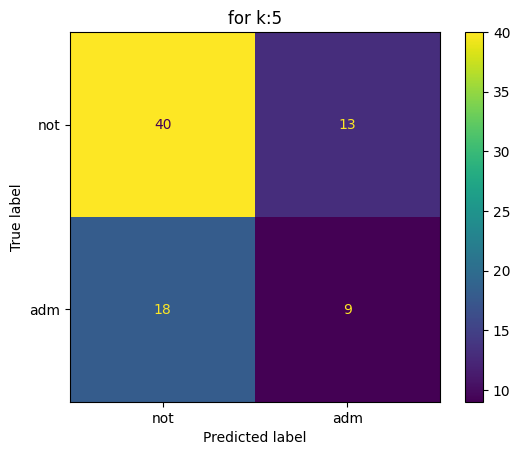

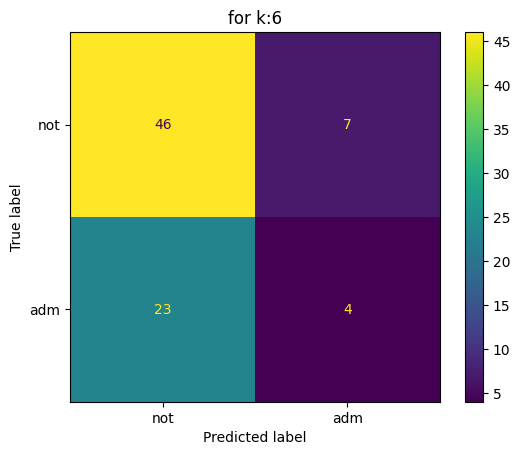

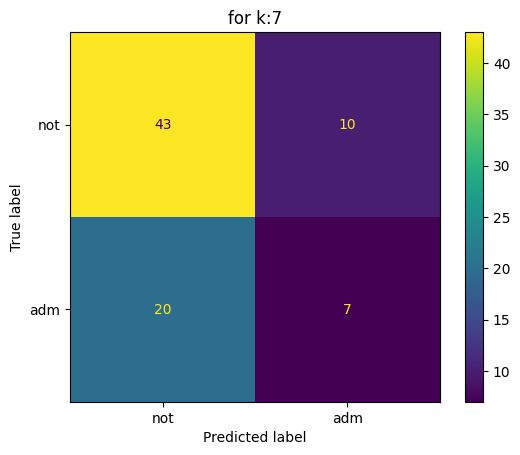

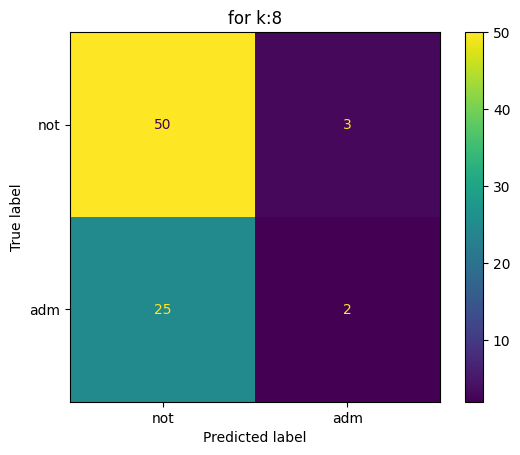

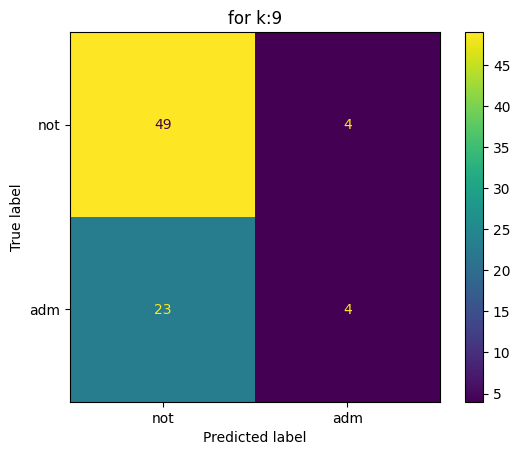

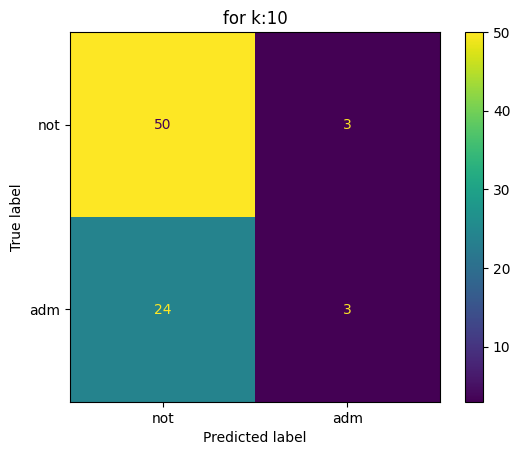

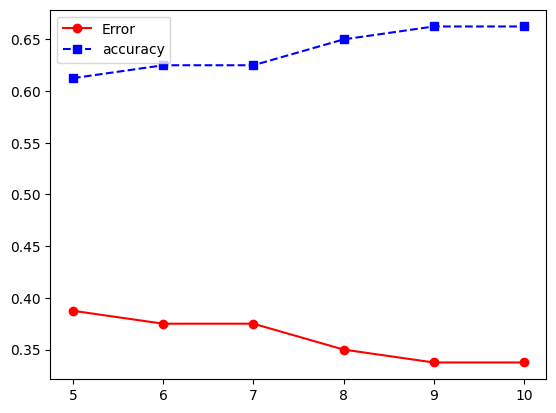

In [78]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

# df=pd.read_csv("admission_data.csv")
# X=df[['gre','gpa','rank']].values
# Y=df['admit'].values

# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# def run_knn(k):
#     knn=KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     y_pred=knn.predict(X_test)
#     cm=confusion_matrix(y_test,y_pred)
#     acc=accuracy_score(y_test,y_pred)
#     misclassification_error=1-acc
#     return cm,misclassification_error,acc

# results = {}
# for k in range(5,10):
#     if k<=len(X_train):
#         cm, error, acc = run_knn(k)
#         results[k] = {'confusion_matrix': cm, 'error': error, 'accuracy': acc}
#         print(cm)
#         print(error)
#         print(acc)
#         disp=ConfusionMatrixDisplay(cm,display_labels=["Not Adm","Admited"])
#         disp.plot()
#         plt.title(f"for k:{k}")
#         plt.show()

# if results:
#     kvals=list(results.keys())
#     errors=[results[k]['error'] for k in kvals]
#     acc=[results[k]['accuracy'] for k in kvals]
#     plt.plot(kvals,errors,'ro-',label='errors')
#     plt.plot(kvals,acc,'bs--',label="accuracy")
#     plt.legend()
#     plt.show()



from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("admission_data.csv")

X=df[['gre','gpa','rank']].values
y=df['admit'].values

scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


def run_knn(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    misc=1-acc
    cm=confusion_matrix(y_test,y_pred)
    
    return acc,misc,cm

acc=[]
errors=[]

for k in range(5,11):
    ac,er,cm=run_knn(k)
    acc.append(ac)
    errors.append(er)
    disp=ConfusionMatrixDisplay(cm,display_labels=["not","adm"])
    disp.plot()
    plt.title(f"for k:{k}")
    plt.show()

K=range(5,11)
if errors:
    plt.plot(K,errors,'ro-',label="Error")
    plt.plot(K,acc,'bs--',label="accuracy")
    plt.legend()
    plt.show()

